## Tracy Owusu 
### 500819150

## Table of context

1. [Dataset](#Dataset)
2. [Analyse probleem](#Analyse)
3. [Voorspelling en methoden](#Voorspelling)
4. [Preprocessing](#Preprocessing)
5. [KNN](#KNN)
6. [SVM](#SVM)
7. [Logistic Regression](#Logistic)
8. [Evaluatie/conclusie](#Evaluatie/conclusie)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import svm

## Dataset

Deze dataset is een dataset over slaap gewoontes van mensen. Ik heb de dataset van [kaggle](https://www.kaggle.com/datasets/mlomuscio/sleepstudypilot).

## Analyse probleem

Voor dit experiment wil ik graag de voorspellen of mensen genoeg slaap hebben of niet. Het probleem is een classificatie probleem. Deze dataset bestaat uit 6 features en heeft 104 rijen aan data. Het heeft de features zijn **Enough, Hours, Phone reach, Phone time, Tired** en **Breakfast**. 

**Enough** geeft aan of de persoon wel of niet genoeg heeft geslapen.<br>
**Hours** staat voor het gemiddelde uur slaap per week.<br>
**PhoneReach** geeft aan of een persoon wel of niet mijn zijn/haar telefooon binnen handbereik slaapt.<br>
**PhoneTime** staat voor als een persoon 30 minuten voor het in slaap vallen gebruikt.<br>
**Tired** aan op een schaal van 1 tot 5 hoe moe mensen zijn door de dag heen, waarbij 1 staat voor helemaal niet moe en 5 voor heel erg moe.<br>
**Breakfast** geeft aan of de persoon regelmatig ontbijt of niet.

In [2]:
data=pd.read_csv('SleepStudyData.csv')
data.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [3]:
data.dtypes

Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object

## Voorspelling en methoden

Ondanks ik met de het uitvoeren van de [t-toets](#http://localhost:8888/notebooks/statistics/t-toets.ipynb) de nul hypothese niet fout heb kunnen bewijzen bij alle onderdelen, heb denk ik dat alle onderdelen van belang zijn voor deze voorspelling. Voor dit experiment gebruik ik **knn, logistic regression** en **svm**.

Bij de knn wordt er geclassifeerd door naar de dichtbijzijnde punten te kijken. De logistic regression werkt op een statistche manier. De svm werkt door een hypervlak te vinden waarbij de klassen zo groot mogelijk van elkaar gescheiden zijn. Ik denk dat de knn het beste zal doen.

<AxesSubplot:xlabel='Tired', ylabel='Enough'>

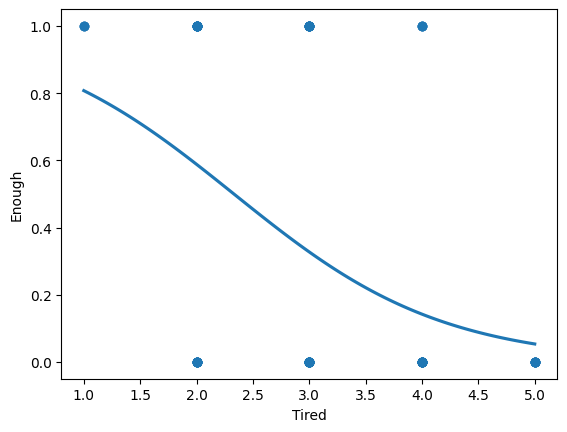

In [19]:
x = data['Tired']

mapping = {'Yes': 1, 'No': 0}

y = data['Enough'].astype(str).replace(mapping)

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)


<AxesSubplot:xlabel='Hours', ylabel='Enough'>

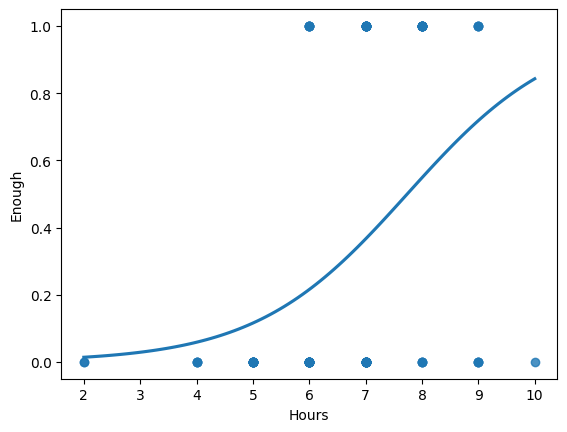

In [20]:
x = data['Hours']

mapping = {'Yes': 1, 'No': 0}

y = data['Enough'].astype(str).replace(mapping)

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

In [21]:
print("Eerst check ik of er geen 0 waardes zijn")
data[(data == 0)].count()

Eerst check ik of er geen 0 waardes zijn


Enough        0
Hours         0
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

In [22]:
print("Ik check daarnaast ook of er NaN waardes zijn en vervang ze met het gemiddelde.")
nan_counts = data.isnull().sum()
print("Het aantal NaN values die in de dataset zijn: " + nan_counts.astype(str))

Ik check daarnaast ook of er NaN waardes zijn en vervang ze met het gemiddelde.
Enough        Het aantal NaN values die in de dataset zijn: 0
Hours         Het aantal NaN values die in de dataset zijn: 2
PhoneReach    Het aantal NaN values die in de dataset zijn: 0
PhoneTime     Het aantal NaN values die in de dataset zijn: 0
Tired         Het aantal NaN values die in de dataset zijn: 0
Breakfast     Het aantal NaN values die in de dataset zijn: 0
dtype: object


In [23]:
mean = data['Hours'].mean()
data['Hours'].fillna(mean, inplace=True)
nan_counts = data.isnull().sum()
print("Het aantal NaN values die in de dataset zijn: " + nan_counts.astype(str))

Enough        Het aantal NaN values die in de dataset zijn: 0
Hours         Het aantal NaN values die in de dataset zijn: 0
PhoneReach    Het aantal NaN values die in de dataset zijn: 0
PhoneTime     Het aantal NaN values die in de dataset zijn: 0
Tired         Het aantal NaN values die in de dataset zijn: 0
Breakfast     Het aantal NaN values die in de dataset zijn: 0
dtype: object


Omdat de knn gemaakt is om te werken met numerieke data gebruik ik de label encoder

In [24]:
data

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes
...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes


In [25]:
le = LabelEncoder()

selectect_columns = ['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']

for col in selectect_columns:
    data[col] = le.fit_transform(data[col])

data

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1,8.0,1,1,3,1
1,0,6.0,1,1,3,0
2,1,6.0,1,1,2,1
3,0,7.0,1,1,4,0
4,0,7.0,1,1,2,1
...,...,...,...,...,...,...
99,0,7.0,1,1,2,1
100,0,7.0,0,1,3,1
101,1,8.0,1,1,3,1
102,1,7.0,1,1,2,1


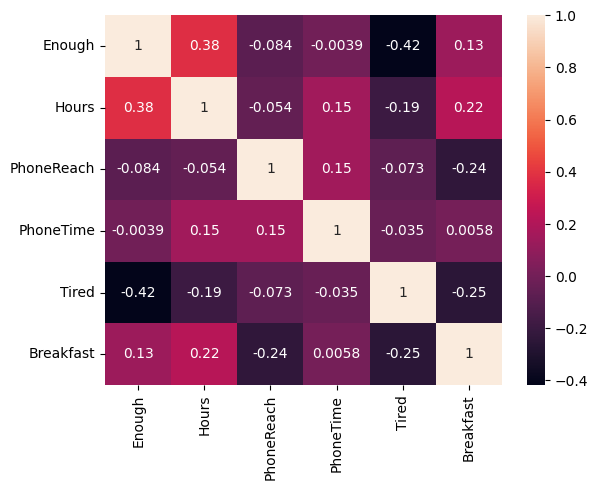

aan de correlatie matrix is er te zien dat tired het meest effect heeft op enough en ook hours.


In [26]:
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

print("aan de correlatie matrix is er te zien dat tired het meest effect heeft op enough en ook hours.")

## Preprocessing

In [27]:
x = data.drop(["Enough"], axis = 1)
y = data['Enough']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

## KNN

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_score = metrics.accuracy_score(knn_pred, y_test)
knn_score

C:\Users\misst\aai-env\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7619047619047619

### SVM

In [21]:
svm_model = svm.SVC(kernel='linear',  probability=True)
svm_model.fit(x_train,y_train)
svm_pred = svm_model.predict(x_test)
svm_score = metrics.accuracy_score(svm_pred, y_test)
svm_score

0.7619047619047619

## Logistic regression

In [32]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test) 
lr_score = metrics.accuracy_score(lr_pred, y_test)
lr_score

0.7142857142857143

## Evaluatie/conclusie

In [33]:
print("knn: " + str(knn_score))
print("svm: " + str(svm_score))
print("logistic regression: " + str(lr_score))

knn: 0.7619047619047619
svm: 0.7619047619047619
logistic regression: 0.7142857142857143


AUC:  0.8557692307692307


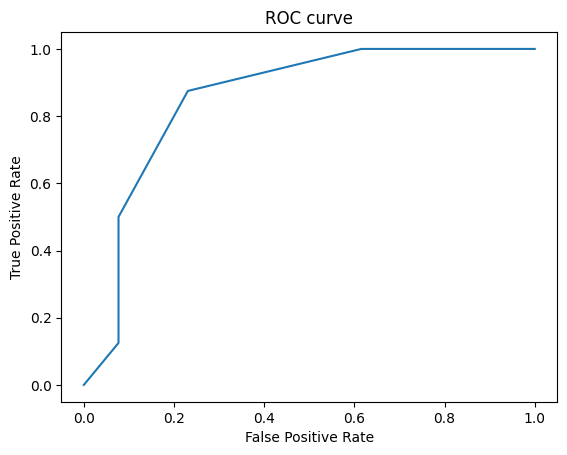

In [34]:
probs = knn_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC: ", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

AUC:  0.8557692307692307


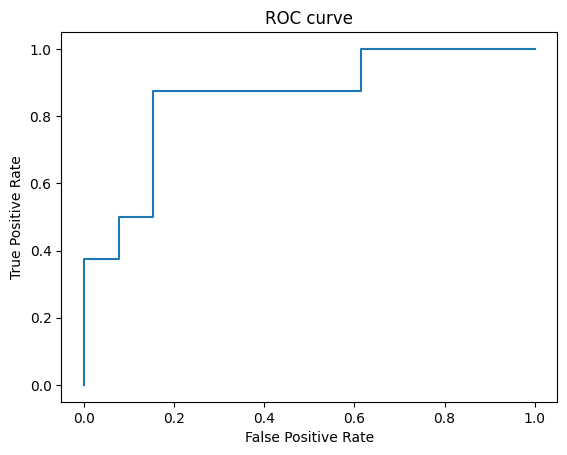

In [35]:
probs = svm_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC: ", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

AUC:  0.8653846153846154


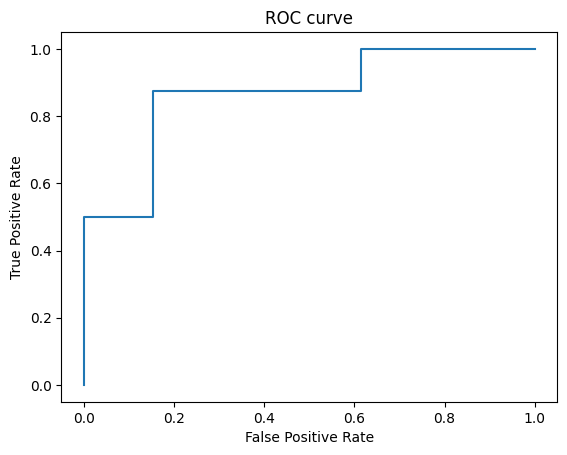

In [36]:
probs = lr_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC: ", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Als ik alle auc scores vergelijk kom ik uit dat de linear regression hoogst waarschijnlijk het beste resultaat heeft geleverd. Alle classifiers geven een goed resultaat.